<a href="https://colab.research.google.com/github/Joykareko/Kaggle_bipoc_project/blob/main/Kaggle_bipoc_project_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

*Part 1. Import libraries*

In [81]:
#!pip install prophet
#!pip install pystan

In [82]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.dummy import DummyRegressor
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from pandas import to_datetime
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')
os.getcwd()

'/content'

In [83]:
df1 = pd.read_csv('/content/combined_file.csv')
df2 = pd.read_csv('/content/combined_file_market_cap.csv')

*Part 2: Visualization*

The line graph showed an overall upward trend in prices for all coins over time.

In [84]:
fig = px.line(
            data_frame=df1, x= pd.to_datetime(df1['date']), y="price_in_usd",color='coin',
              title='Prices Trend in USD')

fig.update_xaxes(
  rangeslider_visible=True,
  rangeselector=dict(
      buttons=list([
          dict(count=1, label="1m", step="month", stepmode="backward"),
          dict(count=6, label="6m", step="month", stepmode="backward"),
          dict(count=1, label="YTD", step="year", stepmode="todate"),
          dict(count=1, label="1y", step="year", stepmode="backward"),
          dict(step="all")
      ])
  )
)
fig.update_layout(xaxis_title='Year',yaxis_title='Price in USD')

The line graph showed an overall upward trend in market capitalization for all coins over time and then a downward trend in 2023

In [85]:
fig2 = px.line(
            data_frame=df2, x = pd.to_datetime(df2['date']),y='market_capitalization_in_usd',color='coin',
        title = 'Market Capitalization in USD')

fig2.update_xaxes(
  rangeslider_visible=True,
  rangeselector=dict(
      buttons=list([
          dict(count=1, label="1m", step="month", stepmode="backward"),
          dict(count=6, label="6m", step="month", stepmode="backward"),
          dict(count=1, label="YTD", step="year", stepmode="todate"),
          dict(count=1, label="1y", step="year", stepmode="backward"),
          dict(step="all")
      ])
  )
)
fig2.update_layout(xaxis_title='Year',yaxis_title='Market Capitalization in USD')

*Part 3.Modelling Moving Average*

In [86]:
def moving_avg_thirty(coin):

    new_df = df1[df1['coin'] == coin]
    new_df['moving_average_30'] = new_df['price_in_usd'].rolling(30).mean()
    new_df.dropna(inplace=True)

    fig = px.line(data_frame=new_df, y = 'moving_average_30',x=pd.to_datetime(new_df['date']),
        title = 'Monthly Moving Average')
    fig.update_layout(xaxis_title='date',yaxis_title='Price in USD')
    fig.show()

moving_avg_thirty(coin='BITCOIN')

In [87]:
def moving_avg_seven(coin):
    new_df = df1[df1['coin'] == coin]

    new_df['moving_average_7'] = new_df['price_in_usd'].rolling(7).mean()
    new_df.dropna(inplace=True)
    fig = px.line(data_frame=new_df, y = 'moving_average_7',x=pd.to_datetime(new_df['date']),
        title = 'Weekly Moving Average')
    fig.update_layout(xaxis_title='date',yaxis_title='Price in USD')
    fig.show()

moving_avg_seven(coin='BITCOIN')

*Part 4: Correlation and Autocorrelation*

In [88]:
def corr(coin,days=1):
  new_df = df1[df1.coin==coin]
  new_df['price.L1'] = new_df['price_in_usd'].shift(days)
  new_df.dropna(inplace=True)
  corr = new_df[['price_in_usd','price.L1']].corr().iloc[-1][0]
  if corr > 0.7:
    print(f'corelation between {days} day is {corr},indication:High')
  else:
    print('correlation is low')
corr(coin='BITCOIN',days=7)

corelation between 7 day is 0.9930670397142912,indication:High


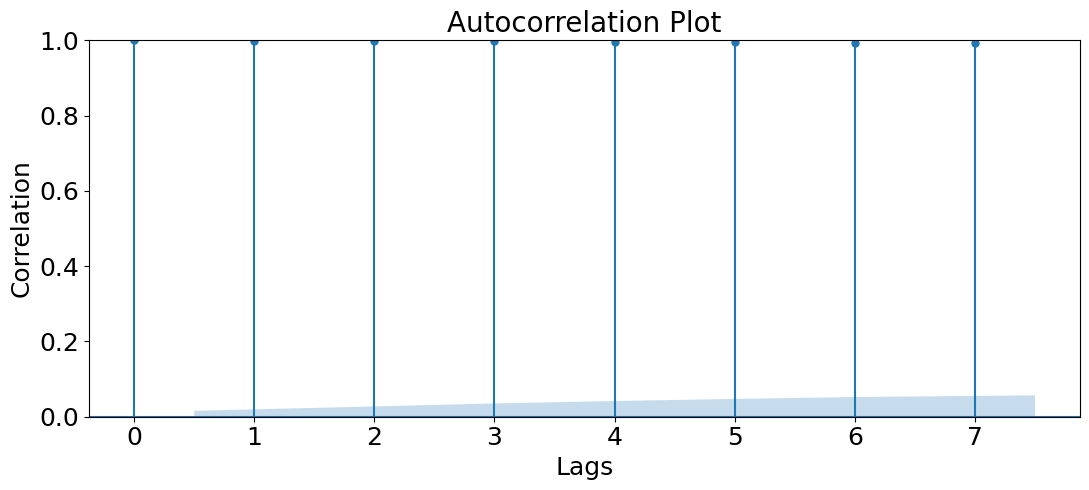

In [89]:
# Plot autocorrelation
plt.rc("figure", figsize=(11,5))
plot_acf(df1['price_in_usd'], lags=7)
plt.ylim(0,1)
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Autocorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()

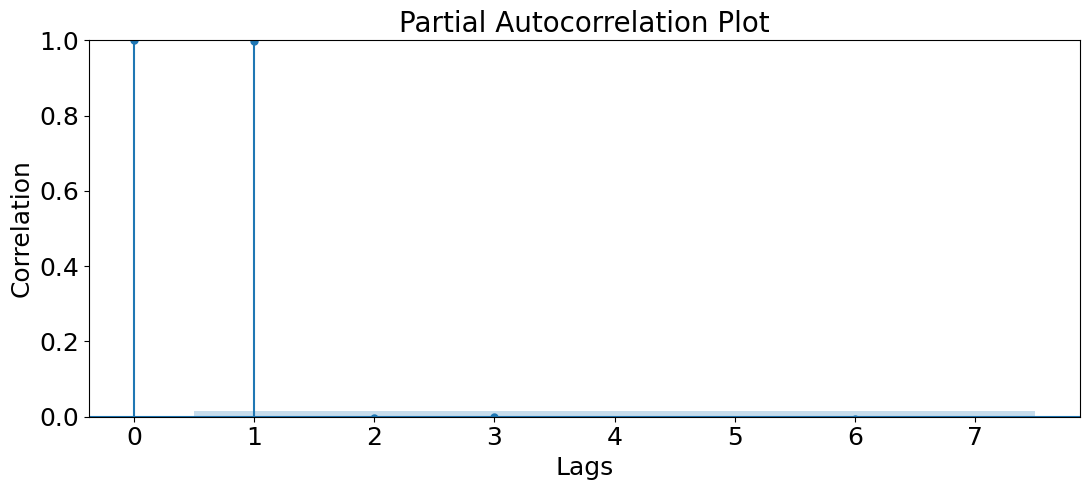

In [90]:
# Plot partial autocorrelation
plt.rc("figure", figsize=(11,5)) #build a dashboard
plot_pacf(df1['price_in_usd'], lags=7)
plt.ylim(0,1)
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Partial Autocorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()

*Part 5:Machine learning modelling*
* drop target variable
* split data using time series split
* develop a baseline using dummy regressor
* use 365 days of data to predict 7 days of data.

In [91]:
# target = 'price_in_usd'
# X = df1.drop(columns=target)
# y = df1[target]

In [92]:
# for i, (train_index, test_index) in enumerate(tscv.split(df1)):
#     print(f"Fold {i}:")
#     print(f"Train: index={train_index}")
#     print(f"Test:  index={test_index}")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm4cfhdaq/dhajwpkv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm4cfhdaq/88bpomgz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35972', 'data', 'file=/tmp/tmpm4cfhdaq/dhajwpkv.json', 'init=/tmp/tmpm4cfhdaq/88bpomgz.json', 'output', 'file=/tmp/tmpm4cfhdaq/prophet_modelkqu_mz_d/prophet_model-20231030091829.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:18:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:18:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2023-09-22  6.291408    2.809325    9.896791
1 2023-09-23  6.275341    2.883398    9.919833
2 2023-09-24  6.274193    2.765923   10.054328
3 2023-09-25  6.194064    2.569949    9.540337
4 2023-09-26  6.171991    2.670483    9.578736


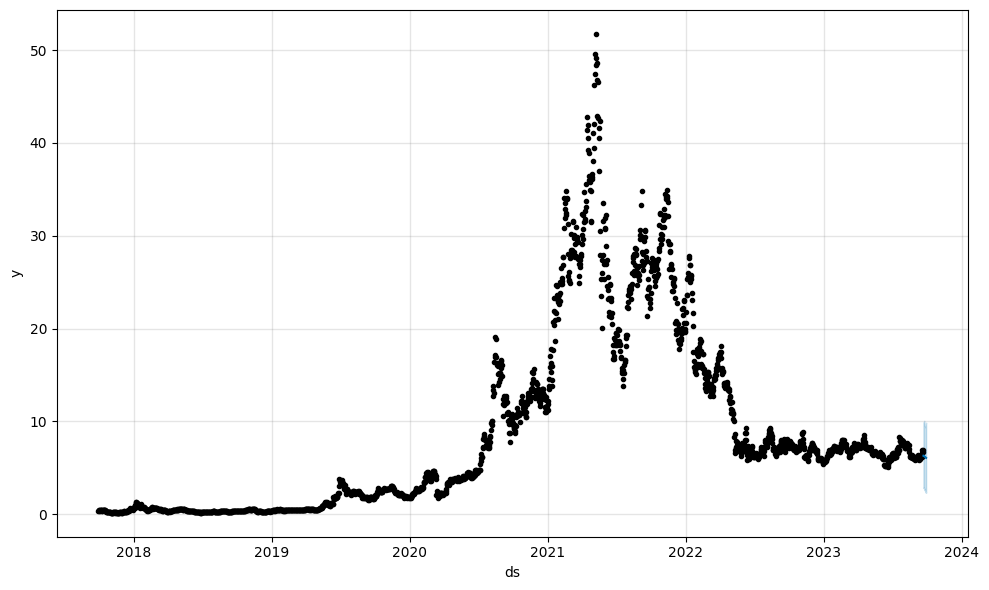

In [93]:
def modelling(df = df1,coin='BITCOIN'):
    new_df = df[df.coin==coin]
    #display(new_df)
    new_df['date']= to_datetime(df['date'])
    new_df.rename(columns = {'date':'ds','price_in_usd':'y'},inplace=True)
    model = Prophet()
    model.fit(new_df)

    # define the period for which we want a prediction
    future = list()
    date = (new_df['ds'].iloc[-1])
    for i in range(8):

        date += datetime.timedelta(days=1)  #'2023-%22d' % i
        future.append([date])
    future = pd.DataFrame(future)
    future.columns = ['ds']
    future['date']= to_datetime(future['ds'])

    # use the model to make a forecast
    forecast = model.predict(future)
    # summarize the forecast
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
    # plot forecast
    model.plot(forecast)
    plt.show()
modelling(coin='CHAINLINK')

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm4cfhdaq/cgvqpu3b.json


(3318, 3)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpm4cfhdaq/zfcv3cfk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8055', 'data', 'file=/tmp/tmpm4cfhdaq/cgvqpu3b.json', 'init=/tmp/tmpm4cfhdaq/zfcv3cfk.json', 'output', 'file=/tmp/tmpm4cfhdaq/prophet_modelep6zmfak/prophet_model-20231030091830.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:18:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:18:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2023-09-15  0.274907    0.037829    0.502479
1 2023-09-16  0.275010    0.026754    0.525998
2 2023-09-17  0.271914    0.042668    0.506760
3 2023-09-18  0.269502    0.027170    0.517003
4 2023-09-19  0.267813    0.024806    0.502090
5 2023-09-20  0.266708    0.024188    0.503380
6 2023-09-21  0.267053    0.029650    0.506834
              ds         y
15354 2023-09-15  0.501050
15355 2023-09-16  0.499417
15356 2023-09-17  0.492272
15357 2023-09-18  0.503091
15358 2023-09-19  0.513675
15359 2023-09-20  0.521064
15360 2023-09-21  0.507035
MAE: 0.235


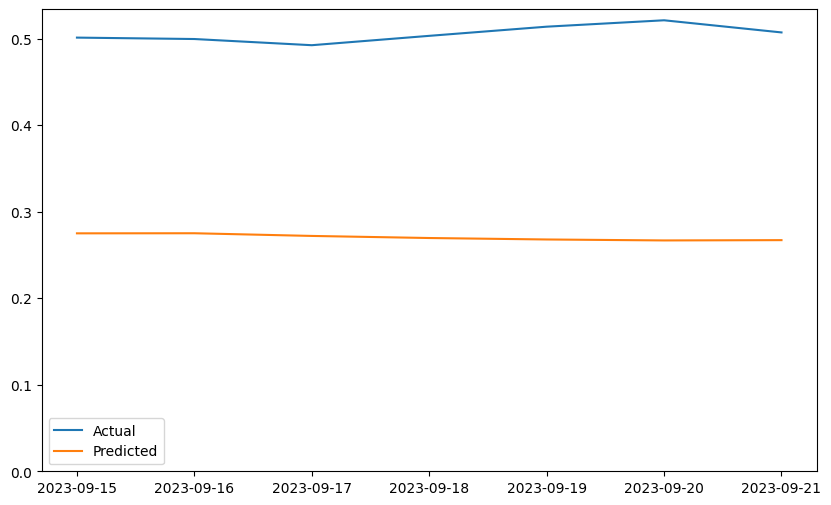

In [94]:
# create test dataset, remove last 7 days of data
def model_test(df=df1,coin='BITCOIN'):
    new_df = df[df.coin==coin]
    #display(new_df)
    new_df['date']= to_datetime(df['date'])
    new_df.rename(columns = {'date':'ds','price_in_usd':'y'},inplace=True)
    train = new_df.drop(new_df.index[-7:])
    print(train.shape)
    model = Prophet()
    model.fit(train)

    # define the period for which we want a prediction
    future = list()
    date = (train['ds'].iloc[-1])
    for i in range(7):

        date += datetime.timedelta(days=1)
        future.append([date])
    future = pd.DataFrame(future)
    future.columns = ['ds']
    future['date']= to_datetime(future['ds'])

    # use the model to make a forecast
    forecast = model.predict(future)
    # summarize the forecast
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    # calculate MAE between expected and predicted values
    y_true = new_df[['ds','y']][-7:]
    print(y_true)
    y_pred = forecast['yhat']
    mae = mean_absolute_error(y_true['y'], y_pred)
    print('MAE: %.3f' % mae)

    # plot expected vs actual
    fig,ax = plt.subplots(1,figsize=(10,6))
    plt.plot(y_true['ds'],y_true['y'],label='Actual')
    plt.plot(y_true['ds'], y_pred,label='Predicted')
    ax.set_ylim(ymin=0)
    plt.legend()
    plt.show()
model_test(df=df1,coin='XRP')

In [95]:
def cross_val_folds(data= df1,train_size = 365,test_size=7,coin='BITCOIN'):
    new_df = df1[df1.coin==coin]
    #rint('shape of new dataframe is',new_df.shape)
    tscv = TimeSeriesSplit(max_train_size = train_size,test_size=test_size)
    cross_val_splits = tscv.split(new_df)
    for i, (train_index, test_index) in enumerate(cross_val_splits):
        # print(f"Fold {i}:")
        # print(f"  Train: index={train_index}")
        # print(f"  Test:  index={test_index}")
        train_index = train_index
        test_index = test_index
    return train_index,test_index
cross_val_folds()
# cnt=1
# for train_index,test_index in cross_val_folds(train_size=365,test_size=7):
#   print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
#   cnt += 1


(array([4442, 4443, 4444, 4445, 4446, 4447, 4448, 4449, 4450, 4451, 4452,
        4453, 4454, 4455, 4456, 4457, 4458, 4459, 4460, 4461, 4462, 4463,
        4464, 4465, 4466, 4467, 4468, 4469, 4470, 4471, 4472, 4473, 4474,
        4475, 4476, 4477, 4478, 4479, 4480, 4481, 4482, 4483, 4484, 4485,
        4486, 4487, 4488, 4489, 4490, 4491, 4492, 4493, 4494, 4495, 4496,
        4497, 4498, 4499, 4500, 4501, 4502, 4503, 4504, 4505, 4506, 4507,
        4508, 4509, 4510, 4511, 4512, 4513, 4514, 4515, 4516, 4517, 4518,
        4519, 4520, 4521, 4522, 4523, 4524, 4525, 4526, 4527, 4528, 4529,
        4530, 4531, 4532, 4533, 4534, 4535, 4536, 4537, 4538, 4539, 4540,
        4541, 4542, 4543, 4544, 4545, 4546, 4547, 4548, 4549, 4550, 4551,
        4552, 4553, 4554, 4555, 4556, 4557, 4558, 4559, 4560, 4561, 4562,
        4563, 4564, 4565, 4566, 4567, 4568, 4569, 4570, 4571, 4572, 4573,
        4574, 4575, 4576, 4577, 4578, 4579, 4580, 4581, 4582, 4583, 4584,
        4585, 4586, 4587, 4588, 4589, 

In [101]:
# create test dataset, remove last 7 days of data
def model_prophet(df=df1,train_size=365,test_size=7,coin='BITCOIN'):
  #display(new_df)
    new_df = df[df.coin==coin]
    train_index,test_index = cross_val_folds(train_size=train_size,test_size=test_size)
    # for train_index,test_index:
    # print(f'creating predictions for {coin} for {train_size} training days and {test_size} testing days')
    new_df['date']= to_datetime(df['date'])
    new_df.rename(columns = {'date':'ds','price_in_usd':'y'},inplace=True)
    train_df = new_df.iloc[train_index,:]
    test_df = new_df.iloc[test_index,:]
    # print('shape of training using prophet:',train_df.shape)
    # print('shape of testing using prophet:',test_df.shape)
    model = Prophet()
    model.fit(train_df)

    # define the period for which we want a prediction
    future = list()
    date = (train_df['ds'].iloc[-1])
    # print(date)
    for i in range(test_size):

        date += datetime.timedelta(days=1)
        future.append([date])
    future = pd.DataFrame(future)
    future.columns = ['ds']
    future['date']= to_datetime(future['ds'])

    # use the model to make a forecast
    forecast = model.predict(future)
    # summarize the forecast
    #print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    # print(f'forecasting for {test_size}days')
    reslts_table = forecast[['ds','yhat']]
    # print(forecast[['ds', 'yhat']])
    # calculate MAE between expected and predicted values
    y_true = new_df[['ds','y']].iloc[test_index]
    # print(y_true)
    y_pred = forecast['yhat']
    mae = mean_absolute_error(y_true['y'], y_pred)
    rmse = mean_squared_error(y_true['y'], y_pred,squared=False)
    #r2_score = r2_score(y_true['y'], y_pred)
    # print('MAE: %.3f' % mae)
    # print('RMSE: %.3f' % rmse)
    rslts = {'model':'Prophet','coin':coin,'train_size':train_size,'test_size':test_size,'mae':mae,'rmse':rmse}
    rslts_final = pd.DataFrame([rslts])
    return reslts_table,rslts_final
    # plot expected vs actual
    # fig,ax = plt.subplots(1,figsize=(10,6))
    # plt.plot(y_true['ds'],y_true['y'],label='Actual')
    # plt.plot(y_true['ds'], y_pred,label='Predicted')
    # ax.set_ylim(ymin=0)
    # plt.legend()
    # plt.show()
model_prophet()
# mae

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm4cfhdaq/5s4kjwdp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm4cfhdaq/1biuvx0_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94821', 'data', 'file=/tmp/tmpm4cfhdaq/5s4kjwdp.json', 'init=/tmp/tmpm4cfhdaq/1biuvx0_.json', 'output', 'file=/tmp/tmpm4cfhdaq/prophet_modelh82v_ft1/prophet_model-20231030093111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:31:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:31:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


(          ds          yhat
 0 2023-09-15  26723.968644
 1 2023-09-16  26680.314275
 2 2023-09-17  26683.329451
 3 2023-09-18  26559.967070
 4 2023-09-19  26710.927135
 5 2023-09-20  26597.195891
 6 2023-09-21  26508.672272,
      model     coin  train_size  test_size       mae       rmse
 0  Prophet  BITCOIN         365          7  237.8353  301.99616)

In [106]:
def dummy_regressor(df=df1,train_size=365,test_size=7,coin='BITCOIN'):
  model = DummyRegressor(strategy='mean')
  print(f'creating predictions for {coin} for {train_size} training days and {test_size} testing days')
  #display(new_df)
  new_df = df[df.coin==coin]
  train_index,test_index = cross_val_folds(train_size=train_size,test_size=test_size)
  new_df['date']= to_datetime(df['date'])
  new_df.rename(columns = {'date':'ds','price_in_usd':'y'},inplace=True)
  train_df = new_df.iloc[train_index,:]
  test_df = new_df.iloc[test_index,:]
  # print('shape of training using dummy regressor:',train_df.shape)
  # print('shape of testing using dummy regressor:',test_df.shape)
  model = DummyRegressor(strategy='mean')
  X = sm.add_constant(train_df['y'])
  #print(X)
  model = sm.OLS(train_df['y'],X)
  results = model.fit()
  preds = (results.params[0] - results.params[1]*test_df['y'])*-1
  #print(preds)
  #reslts_table = preds[['ds','preds']]
  #print(reslts_table)
 # calculate MAE between expected and predicted values
  y_true = new_df[['ds','y']].iloc[test_index]
  #print(y_true)
  # y_pred = forecast['yhat']
  mae = mean_absolute_error(y_true['y'], preds)
  rmse = mean_squared_error(y_true['y'], preds,squared=False)
  # #r2_score = r2_score(y_true['y'], y_pred)
  # print('MAE: %.3f' % mae)
  # print('RMSE: %.3f' % rmse)
  rslts = {'model':'dummy_regressor','coin':coin,'train_size':train_size,'test_size':test_size,'mae':mae,'rmse':rmse}
  rslts_final = pd.DataFrame([rslts])
  return y_true,rslts_final
  # return mae,rmse
dummy_regressor()

creating predictions for BITCOIN for 365 training days and 7 testing days


(             ds            y
 4807 2023-09-15  26672.61608
 4808 2023-09-16  26555.63610
 4809 2023-09-17  26502.43212
 4810 2023-09-18  26764.63191
 4811 2023-09-19  27215.05048
 4812 2023-09-20  27133.40372
 4813 2023-09-21  26571.59529,
              model     coin  train_size  test_size           mae          rmse
 0  dummy_regressor  BITCOIN         365          7  1.455192e-11  1.455192e-11)

In [108]:
def linear_regressor(df=df1,train_size=365,test_size=7,coin='BITCOIN'):
  #model = LinearRegression()
  print(f'creating predictions for {coin} for {train_size} training days and {test_size} testing days')
  #display(new_df)
  new_df = df[df.coin==coin]
  train_index,test_index = cross_val_folds(train_size=train_size,test_size=test_size)
  new_df['date']= to_datetime(df['date'])
  new_df.rename(columns = {'date':'ds','price_in_usd':'y'},inplace=True)
  train_df = new_df.iloc[train_index,:]
  test_df = new_df.iloc[test_index,:]

  model = LinearRegression()
  X = sm.add_constant(train_df['y'])
  #print(X)
  model = sm.OLS(train_df['y'],X)
  results = model.fit()
  preds = (results.params[0] - results.params[1]*test_df['y'])*-1
  #print(preds)
 # calculate MAE between expected and predicted values
  y_true = new_df[['ds','y']].iloc[test_index]
  print(y_true)
  # y_pred = forecast['yhat']
  mae = mean_absolute_error(y_true['y'], preds)
  rmse = mean_squared_error(y_true['y'], preds,squared=False)
  # #r2_score = r2_score(y_true['y'], y_pred)
  #print('MAE: %.3f' % mae)
  #print('RMSE: %.3f' % rmse)
  rslts = {'model':'linear_regression','coin':coin,'train_size':train_size,'test_size':test_size,'mae':mae,'rmse':rmse}
  rslts_final = pd.DataFrame([rslts])
  return rslts_final
  # return mae,rmse
linear_regressor()

creating predictions for BITCOIN for 365 training days and 7 testing days
             ds            y
4807 2023-09-15  26672.61608
4808 2023-09-16  26555.63610
4809 2023-09-17  26502.43212
4810 2023-09-18  26764.63191
4811 2023-09-19  27215.05048
4812 2023-09-20  27133.40372
4813 2023-09-21  26571.59529


,model,coin,train_size,test_size,mae,rmse
0,linear_regression,BITCOIN,365,7,1.455192e-11,1.455192e-11


In [99]:
def model_to_choose(prophet=True,linear_regression=False,dummy_regressor=False):
    if prophet == True:
      print('model selected is prophet')
      rslts = model_prophet()
    if dummy_regressor == True:
      print('You will be using a dummy regressor')
      rslts=dummy_regressor()
    if linear_regression == True:
      print('model is a linear regression model')
      rslts=linear_regressor()
      return rslts
model_to_choose()


model selected is prophet


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm4cfhdaq/fr2ves38.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm4cfhdaq/_866q10n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98986', 'data', 'file=/tmp/tmpm4cfhdaq/fr2ves38.json', 'init=/tmp/tmpm4cfhdaq/_866q10n.json', 'output', 'file=/tmp/tmpm4cfhdaq/prophet_modelv7ncjk8z/prophet_model-20231030091832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:18:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:18:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [100]:
#drop down showing options on which model to use and the number of days to implement(14/7 etc) and
#explore tabs(descriptive/forecasts)
#include the crossvalidation scores for different estimators for (linear regression/dummy regressor/prophet)-select either
#training files number of days to train on(6months/1year/7days and 30 days)-drop down menu
#use the 7 days for testing.
#compute these metrics and create a dataframe with cols,crypto name/estimator type/training_size(6/1)/mean absolute error/rmse/rsquared.
#read the dataframe and display the metrics
